<a href="https://colab.research.google.com/github/KoshiBG/Python_for_data_analysis/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22hw_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

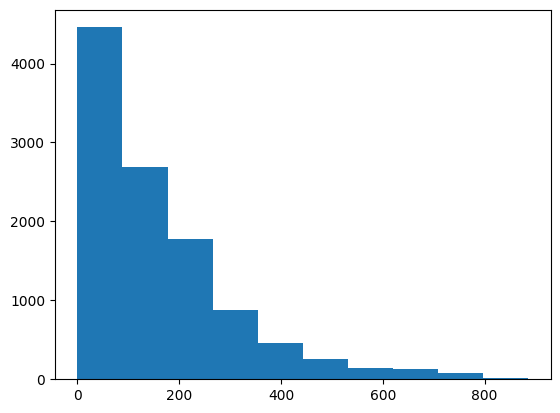

In [4]:
plt.hist(df['registered']);

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

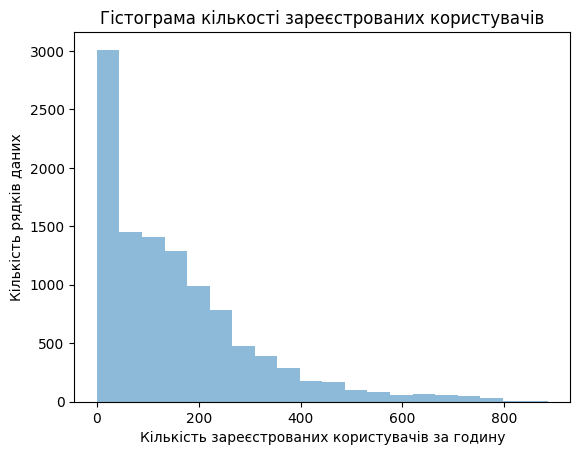

In [8]:
plt.hist(df['registered'],bins=20, alpha=.5)
plt.title("Гістограма кількості зареєстрованих користувачів")
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel("Кількість рядків даних");

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [9]:
df['datetime'] = pd.to_datetime(df.datetime)
df['datetime']

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00
...,...
10881,2012-12-19 19:00:00
10882,2012-12-19 20:00:00
10883,2012-12-19 21:00:00
10884,2012-12-19 22:00:00


І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [12]:
df['dayofweek'] = df.datetime.dt.day_of_week
df['dayofweek'].head()

,dayofweek
0,5
1,5
2,5
3,5
4,5


Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [14]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

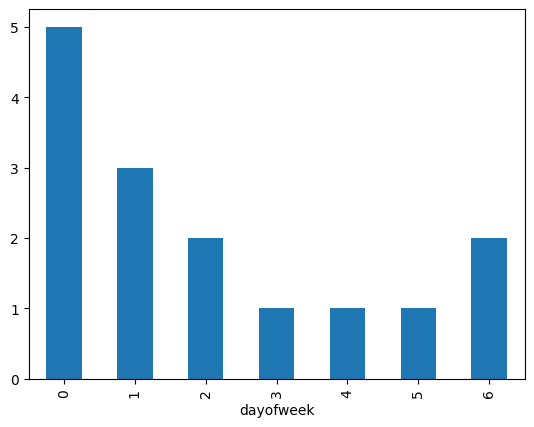

In [18]:
# Фільтруємо записи, де кількість зареєстрованих користувачів дорівнює 0
zero_registered = df[df['registered'] == 0]

# Групуємо дані за днями тижня і рахуємо кількість таких записів
zero_by_day = zero_registered.groupby('dayofweek').size()

zero_by_day.plot(kind='bar');


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

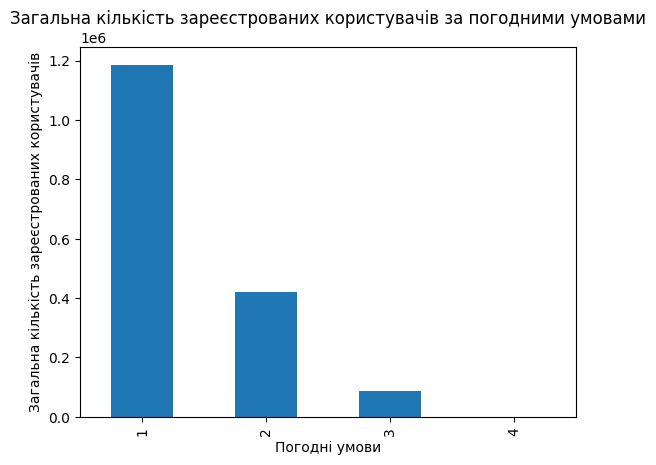

In [24]:
# Групуємо дані за стовпцем з погодними умовами і обчислюємо загальну кількість зареєстрованих користувачів для кожної умови
registered_by_weather = df.groupby('weather')['registered'].sum()

registered_by_weather.plot(kind='bar')

# Додаємо підписи для осей
plt.xlabel('Погодні умови')
plt.ylabel('Загальна кількість зареєстрованих користувачів')
plt.title('Загальна кількість зареєстрованих користувачів за погодними умовами');

Враховуючи, що значення від 2 до 4 відповідають несприятливим погодним умовам по наростаючій, спостерігається зменшення кількості коритсувачів. Не дивно, хто буде кататися на ровері в сніг? :)))

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

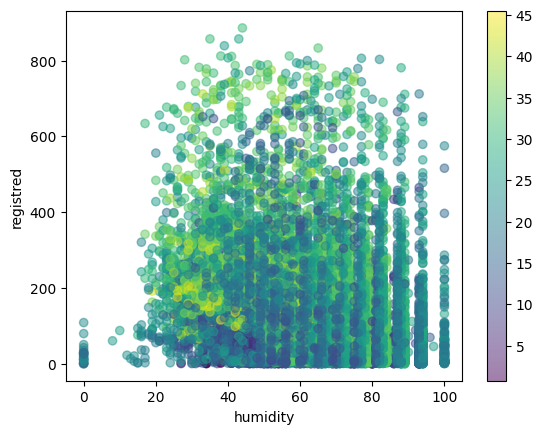

In [57]:
plt.scatter(df['humidity'], df['registered'], c = df['atemp'],
            alpha = 0.5);
plt.xlabel('humidity')
plt.ylabel('registred')
plt.colorbar();

Висновок:

Загалом, графік показує, що кількість зареєстрованих користувачів не має чіткої лінійної залежності від вологості. Активність користувачів є навіть при високих рівнях вологості, але є деякі скупчення точок, які можуть свідчити про зниження активності при дуже високій вологості.
Також варто звернути увагу на те, що температура за відчуттями відіграє важливу роль, оскільки при комфортних умовах користувачі більш активні незалежно від рівня вологості.

Очікуваний результат:



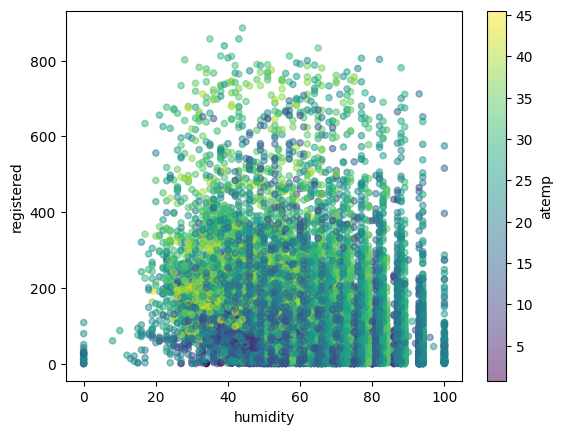